In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='pastel')


In [2]:
file_path = "/Users/moaya/OneDrive/Desktop/mbd-corporateproject-EY-main/Data/Processed/Cleaned_PE.xlsx"
df = pd.read_excel(file_path)
df.head()


pe office_in_spain_(y/n)  pe_hq  \
0                  Abac Capital                     Y  Spain   
1       Alantra Private Equity                      Y  Spain   
2                  Arta Capital                     Y  Spain   
3  Asterion Industrial Partners                     Y  Spain   
4                Aurica Capital                     Y  Spain   

   total_portfolio_companies  total_spanish_companies  \
0                         16                       16   
1                         13                       11   
2                         10                        9   
3                         20                        8   
4                         12                       11   

   total_divested_companies  total_spanish_divested_companies  ticket_ebitda  \
0                         8                               8.0    EBITDA <10M   
1                        53                              46.0  EBITDA 10-30M   
2                        12                              11.0  EBITDA 10-30M   
3                         3                               3.0           n.a.   
4                        12                              11.0    EBITDA <10M   

  ticket_deal_volume/rev                                            sectors  \
0                    NaN  Construction, Consumer: Other, Services, Autom...   
1                    NaN  Industrial Products, Consumer: Foods, Services...   
2                    NaN  Consumer: Foods, Services, Consumer: Other, In...   
3                    NaN  Telecoms, energy & utilities and mobility sectors   
4                    NaN  Chemicals, Software, Services, Industrial Prod...   

                                    top_geographies sourcesheet  \
0                                             Spain    Spain_PE   
1  Spain, Portugal, United Kingdom, Belgium, Brazil    Spain_PE   
2                                   Spain, Portugal    Spain_PE   
3     Spain, Italy, United Kingdom, France, Germany    Spain_PE   
4                             Spain, United Kingdom    Spain_PE   

   ticket_ebitda_min  ticket_ebitda_max ticket_volume_type  ticket_volume_min  \
0                NaN               10.0            Revenue                NaN   
1               10.0               30.0            Revenue                NaN   
2               10.0               30.0            Revenue                NaN   
3                NaN                NaN            Revenue                NaN   
4                NaN               10.0            Revenue                NaN   

   ticket_volume_max  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN

In [3]:
df.columns = [
    "PE", "Office_in_Spain", "PE_HQ", "Total_Portfolio", "Total_Spanish",
    "Total_Divested", "Total_Spanish_Divested", "Ticket_EBITDA",
    "Ticket_Deal_Volume_Type", "Sectors", "Top_Geographies", "SourceSheet",
    "EBITDA_Min", "EBITDA_Max", "Volume_Type", "Volume_Min", "Volume_Max"
]


In [4]:
print("Shape:", df.shape)
display(df.sample(5))
df.info()


Shape: (169, 17)


PE Office_in_Spain  PE_HQ  Total_Portfolio  \
15              Nexxus Iberia               Y  Spain                9   
75   Infracapital Partners LP               N     UK               28   
33         Endurance Partners               Y  Spain                3   
56     Moira Capital Partners               Y  Spain               18   
162        Summit Partners LP               N    USA               92   

     Total_Spanish  Total_Divested  Total_Spanish_Divested Ticket_EBITDA  \
15               8               9                     8.0   EBITDA <10M   
75               2              18                     1.0           NaN   
33               3               6                     6.0   EBITDA <10M   
56              18               0                     0.0   EBITDA <10M   
162              1             208                     NaN             1   

    Ticket_Deal_Volume_Type  \
15                      NaN   
75            EV: 300-1500M   
33                      NaN   
56                      NaN   
162              EV:10-500m   

                                               Sectors  \
15   Medical, Industrial Products, Chemicals, Const...   
75   Leisure, Services (other), Financial Services,...   
33                                          Generalist   
56   Technology, healthcare, energy efficiency, bio...   
162  Computer software, Medical, Services (other), ...   

                                       Top_Geographies SourceSheet  \
15                             Spain, Mexico, Portugal    Spain_PE   
75     United Kingdom, USA, France, Spain, Netherlands       UK_PE   
33                                               Spain    Spain_PE   
56                                               Spain    Spain_PE   
162  USA, Germany, United Kingdom, France, Netherlands      USA_PE   

     EBITDA_Min  EBITDA_Max Volume_Type  Volume_Min  Volume_Max  
15          NaN        10.0     Revenue         NaN         NaN  
75          NaN         NaN          EV       300.0      1500.0  
33          NaN        10.0     Revenue         NaN         NaN  
56          NaN        10.0     Revenue         NaN         NaN  
162         1.0         1.0          EV        10.0       500.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PE                       169 non-null    object 
 1   Office_in_Spain          169 non-null    object 
 2   PE_HQ                    169 non-null    object 
 3   Total_Portfolio          169 non-null    int64  
 4   Total_Spanish            169 non-null    int64  
 5   Total_Divested           169 non-null    int64  
 6   Total_Spanish_Divested   128 non-null    float64
 7   Ticket_EBITDA            134 non-null    object 
 8   Ticket_Deal_Volume_Type  81 non-null     object 
 9   Sectors                  169 non-null    object 
 10  Top_Geographies          168 non-null    object 
 11  SourceSheet              169 non-null    object 
 12  EBITDA_Min               76 non-null     float64
 13  EBITDA_Max               102 non-null    float64
 14  Volume_Type              1

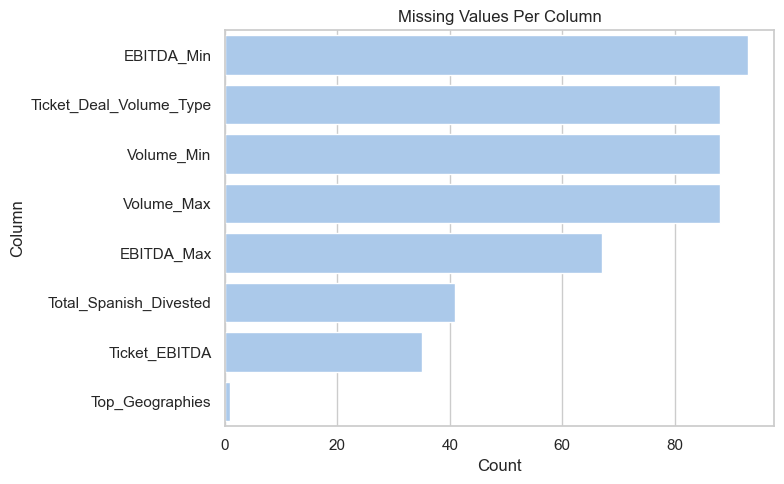

In [5]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=missing.values, y=missing.index)
plt.title("Missing Values Per Column")
plt.xlabel("Count")
plt.ylabel("Column")
plt.tight_layout()
plt.show()


In [6]:
numeric_cols = [
    "Total_Portfolio", "Total_Spanish", "Total_Divested", "Total_Spanish_Divested",
    "EBITDA_Min", "EBITDA_Max", "Volume_Min", "Volume_Max"
]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [7]:
df[numeric_cols].describe().T


count        mean          std  min    25%    50%  \
Total_Portfolio         169.0   50.242604    66.413166  1.0   11.0   23.0   
Total_Spanish           169.0    5.130178     5.913632  0.0    1.0    3.0   
Total_Divested          169.0   56.177515    89.505675  0.0    6.0   23.0   
Total_Spanish_Divested  128.0    6.250000    10.293336  0.0    0.0    2.0   
EBITDA_Min               76.0    9.473684    10.690150  0.0    1.0    6.5   
EBITDA_Max              102.0   11.343137    11.987200  0.0    3.0   10.0   
Volume_Min               81.0   92.701111   157.849682  0.0   10.0   24.0   
Volume_Max               81.0  930.590988  1905.893401  7.0  100.0  400.0   

                           75%      max  
Total_Portfolio           59.0    367.0  
Total_Spanish              7.0     36.0  
Total_Divested            54.0    474.0  
Total_Spanish_Divested     8.0     50.0  
EBITDA_Min                10.0     30.0  
EBITDA_Max                10.0     80.0  
Volume_Min               100.0   1000.0  
Volume_Max              1000.0  15000.0

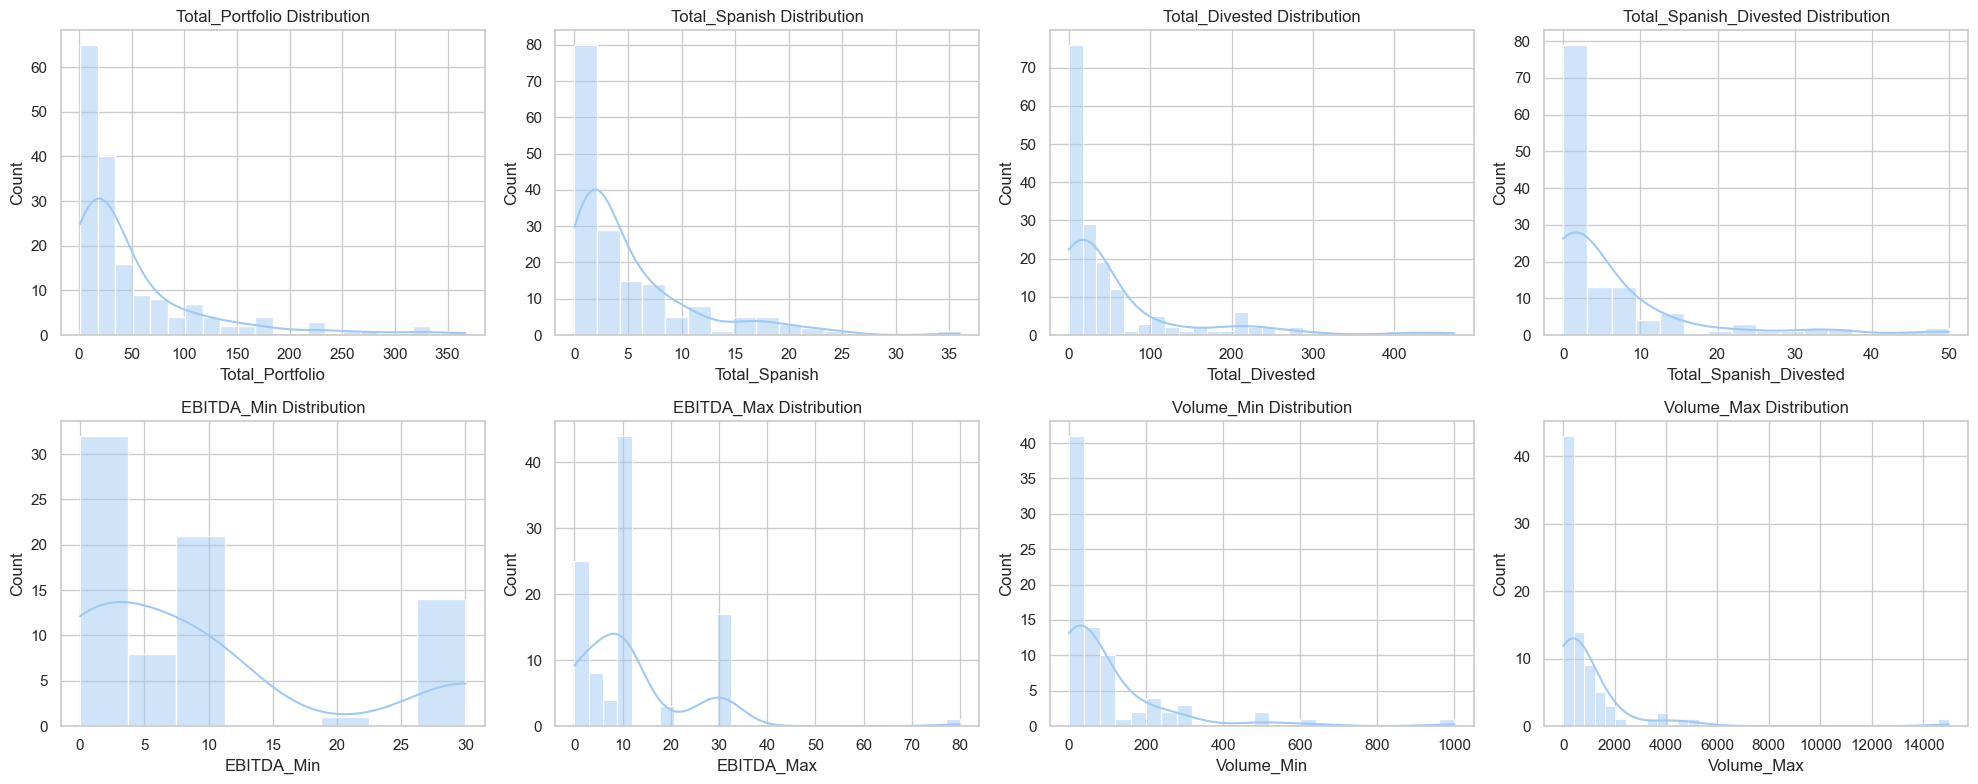

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f"{col} Distribution")

plt.tight_layout()
plt.show()


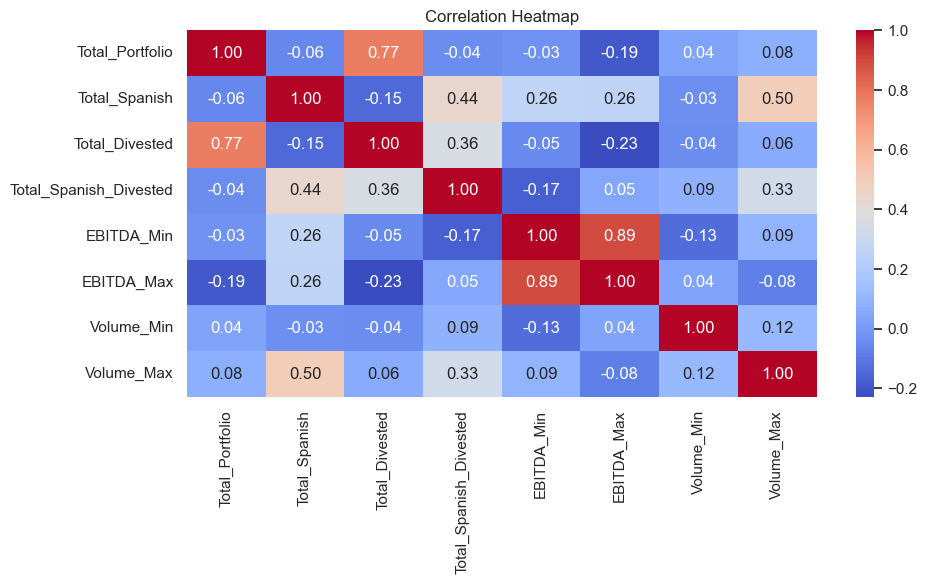

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [10]:
categorical_cols = ["Office_in_Spain", "PE_HQ", "Ticket_EBITDA", "Ticket_Deal_Volume_Type", "Volume_Type"]

for col in categorical_cols:
    print(f"\n--- {col} ---")
    display(df[col].value_counts(dropna=False))



--- Office_in_Spain ---


Office_in_Spain
Y    90
N    79
Name: count, dtype: int64


--- PE_HQ ---


PE_HQ
Spain       58
USA         41
UK          35
France      24
Portugal     5
Italy        3
Germany      3
Name: count, dtype: int64


--- Ticket_EBITDA ---


Ticket_EBITDA
EBITDA <10M       37
NaN               35
0                 17
EBITDA 10-30M     16
n.a.              14
EBITDA > 30M      14
1                  6
3                  5
11                 2
2                  2
7                  2
EBITDA <10m        2
4                  2
EBIDA<10m          1
EBITDA 5-20m       1
Early seed VC      1
EBITDA <30M        1
EBITDA 5-20M       1
EBITDA <20M        1
6                  1
EBITDA: 20-80m     1
                   1
9                  1
EBITDA >1M         1
10                 1
8                  1
5                  1
EBITDA>2m          1
Name: count, dtype: int64


--- Ticket_Deal_Volume_Type ---


Ticket_Deal_Volume_Type
NaN                     88
EV 100-500 M             2
EV 6-20 M                1
Rev 9-180M               1
Rev 45-890M              1
                        ..
Eq. Invest.<100m         1
EV 50-500 M              1
EV <1000 M               1
EV 24-295M               1
44,41M € - 444,11M €     1
Name: count, Length: 81, dtype: int64


--- Volume_Type ---


Volume_Type
Revenue    97
EV         72
Name: count, dtype: int64

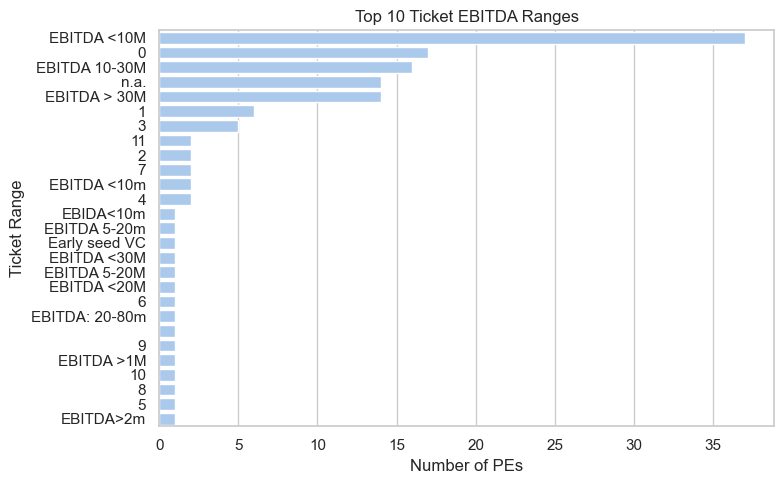

In [17]:
# Get top 10 Ticket EBITDA values
top_10_ebitda = df['Ticket_EBITDA'].value_counts().head(30).index

# Plot only those
plt.figure(figsize=(8, 5))
sns.countplot(data=df[df['Ticket_EBITDA'].isin(top_10_ebitda)],
              y='Ticket_EBITDA',
              order=top_10_ebitda)
plt.title("Top 10 Ticket EBITDA Ranges")
plt.xlabel("Number of PEs")
plt.ylabel("Ticket Range")
plt.tight_layout()
plt.show()

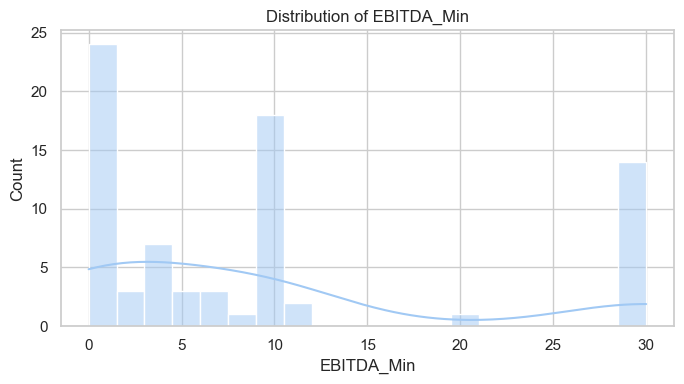

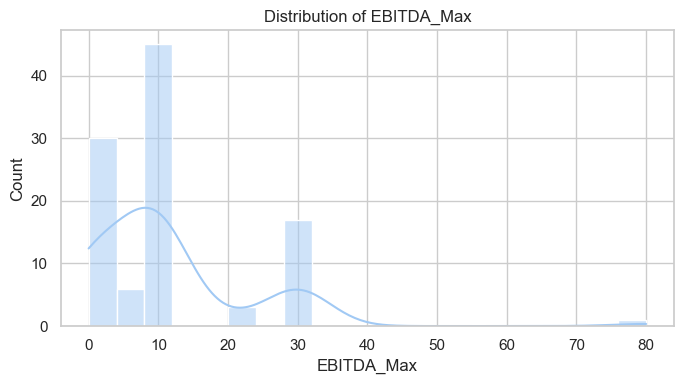

In [20]:
numeric_cols = ['EBITDA_Min', 'EBITDA_Max']

for col in numeric_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

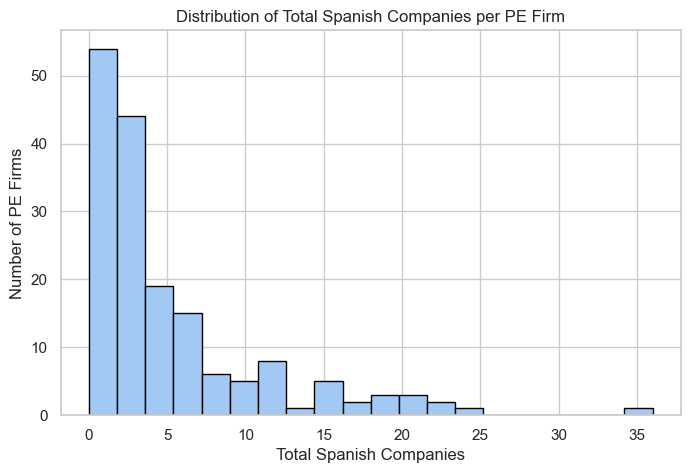

In [19]:
import matplotlib.pyplot as plt

# Histogram of total_spanish_company
plt.figure(figsize=(8, 5))
plt.hist(df['Total_Spanish'], bins=20, edgecolor='black')
plt.title('Distribution of Total Spanish Companies per PE Firm')
plt.xlabel('Total Spanish Companies')
plt.ylabel('Number of PE Firms')
plt.show()

In [11]:
df["Sector_List"] = df["Sectors"].fillna("").apply(lambda x: [i.strip() for i in x.split(",")])
df["Geography_List"] = df["Top_Geographies"].fillna("").apply(lambda x: [i.strip() for i in x.split(",")])

all_sectors = pd.Series([sector for sublist in df["Sector_List"] for sector in sublist])
all_geos = pd.Series([geo for sublist in df["Geography_List"] for geo in sublist])

print("Top 10 Sectors:")
display(all_sectors.value_counts().head(10))

print("\nTop 10 Geographies:")
display(all_geos.value_counts().head(10))


Top 10 Sectors:


Computer software                   71
Services (other)                    69
Medical                             51
Financial Services                  42
Industrial products and services    34
Consumer: Other                     30
Leisure                             29
Construction                        26
Internet / ecommerce                26
Energy                              24
Name: count, dtype: int64


Top 10 Geographies:


Spain             93
USA               77
United Kingdom    71
France            63
Germany           60
Italy             46
Canada            25
Portugal          18
UK                17
Netherlands       16
Name: count, dtype: int64

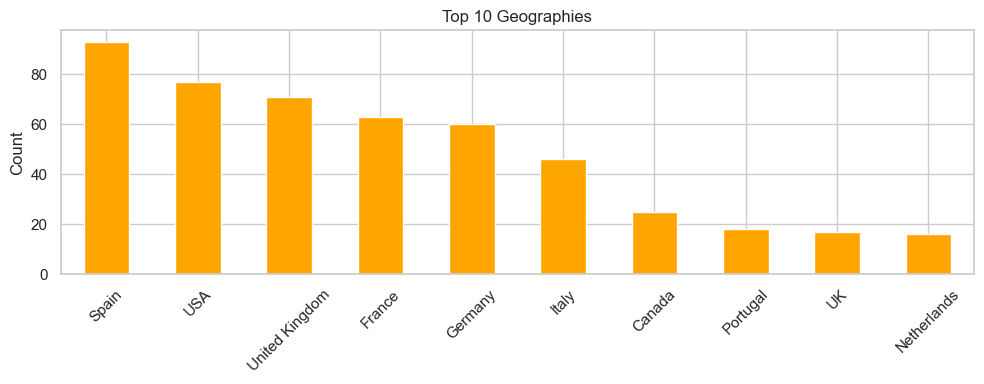

In [12]:
plt.figure(figsize=(10, 4))
all_sectors.value_counts().head(10).plot(kind='bar', title='Top 10 Sectors')
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
all_geos.value_counts().head(10).plot(kind='bar', color='orange', title='Top 10 Geographies')
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.tight_layout()
plt.show()


from IPython.display import Markdown as md

md("""
### ✨ Key Insights

- Most PE firms have a strong presence in Spain, with consistent divestment activity.
- Ticket sizes are typically below €30M in EBITDA or revenue, with some ranges missing (should be cleaned).
- The most targeted sectors are Services, Consumer Foods, and Industrial Products.
- Spain dominates in terms of geography, with Portugal and Italy also appearing frequently.

### 🛠 Recommendations

- **Standardize** sector and geography names (e.g., `Consumer: Foods` vs `Consumer: Other`).
- **Investigate missing ticket ranges** (EBITDA, revenue) for downstream modeling or filtering.
- **Segment PE firms** by sector focus or geography for more advanced clustering/analytics.
- Consider creating **binary flags** for sectors (multi-hot encoding) for ML readiness.
""")
